# Final Project - Faisal Adams

An analysis of the relationship between a drought indicator and fire indicator for the West Coast of the United States (Washignton, Oregon and California)

---

The first cell below contains all the modules required for the analysis.

In [1]:
#  array and analysis modules 
import numpy as np 
from sklearn.cluster import KMeans #, AgglomerativeClustering

# geometry and plot modules
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point, Polygon
from shapely.ops import unary_union
import cartopy.crs as ccrs

# file management modules
import os
import wget
import requests
import pickle

from pydap.client import open_url
from pydap.cas.urs import setup_session




# tqdm to track iteration progress 
from tqdm import tqdm


## Data Extraction and Manipulatpion

The following cells are focused on data extraction and mangement. CSV files of each states are converted to polygons, and a singular polygon is determined for the entire west coast. The files relevant to either fire or drought are stored in individual, separate folders. For both fire and groundwater storage, the required data is stored in a dictionary and saved as a file. This files is trimmed to obtain data for only the west coast and saved as a separate file. 

In [2]:
# loading state files for west coast switching columns to get coordinates in terms of lon, lat
fileCA = np.genfromtxt('./CA_boundary.csv', delimiter=',', skip_header=1, usecols = (1,0))
fileOR = np.genfromtxt('./OR_boundary.csv', delimiter=',', skip_header=1, usecols = (1,0))
fileWA = np.genfromtxt('./WA_boundary.csv', delimiter=',', skip_header=1, usecols = (1,0))

# creating polygons for the states
polyCA = Polygon (fileCA)
polyOR = Polygon(fileOR)
polyWA = Polygon(fileWA)

# single polygon for the entire west coast
mp = [polyCA,polyOR, polyWA] #https://shapely.readthedocs.io/en/stable/manual.html#shapely.ops.cascaded_union
polyCombine = unary_union(mp)



Code cell below checks for the existence of folders to store the fire and drought indicator data.

In [3]:
# hint for code here obtained from 
# https://stackoverflow.com/questions/1274405/how-to-create-new-folder

FR_savepath = './Fire_Files/'
DR_savepath = './Drought_Files/'

if not os.path.exists(FR_savepath):
    os.makedirs(FR_savepath)
    
if not os.path.exists(DR_savepath):
        os.makedirs(DR_savepath)


In [4]:
# # still receiving an "expired SSL certificate error"
# # code in this cell is to bypass that error
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

The code below downloads MODIS fire files and saves them in a folder. It has been commented out because the relevant files were obtained, and the required data saved in a separate dictionary + file.

In [5]:
# code for downloading the MODIS files for fire data 
# https://stackoverflow.com/questions/43224000/multiprocessing-pool-with-a-for-loop

temporalPeriod = list(range(2005,2021))

# urlFire = 'https://firms.modaps.eosdis.nasa.gov/data/country/modis/'

# for year in tqdm(temporalPeriod):
#     url = urlFire + str(year) + '/modis_' + str(year) + '_United_States.csv'
#     fname = 'fire' + str(year) + 'US.csv'
#     fpath = FR_savepath + fname
#     try:
#         response = wget.download(url, fpath)
#         print(fpath)
#     except exception as err:
#         print(err)

The code cell below stores the relevant data in a dictionary

In [6]:
# dictFire = {}
# for i in tqdm(os.listdir(FR_savepath)):
#     temp = {}
#     if i.endswith('.csv'): # prevent from picking up other folders and the .ipynb_checkpoint file 
#         ipath = os.path.join (FR_savepath, i)
#         i = i[:-4]     # removing the CSV extension
#         array = np.genfromtxt (ipath, delimiter=',', names = True, usecols=(0,1,2,5))
#         names = array.dtype.names # to store the column names 
#         N = list(range(len(names)))
#         for name, n in zip (names, N):
#             temp[name] = [k[n] for k in array]
#         dictFire [i] = temp

The cell below saves the dictionary as a pickle file and the cell below that reads the file into a dictionary. It has been commented out because it is superceded by another file below.

In [7]:
fr_file = './Fire_files/fr_dataset.pkl'

# with open (fr_file, 'wb') as f: # hint for code obtained from -- https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file
#     pickle.dump(dictFire, f)

In [8]:
# with open (fr_file, 'rb') as f:
#     fr_dataset = pickle.load(f)



The cell below includes a mask for fires in only the desired states and the west coast.

In [9]:
# dictFire = {}
# for key in tqdm(fr_dataset):
# #    assigning the data to a variable
#     lat = np.asarray(fr_dataset[key]['latitude'])
#     lon = np.asarray(fr_dataset[key]['longitude'])
#     brit = np.asarray(fr_dataset[key]['brightness'])
    
# #     creating empty masks
#     frMask_CA = np.zeros(brit.shape)
#     frMask_OR = np.zeros(brit.shape)
#     frMask_WA = np.zeros(brit.shape)
#     frMaskCombine = np.zeros(brit.shape)
    
    
#     N_lat = range(len(lat))
#     N_lon = range(len(lon))

#     assert N_lat == N_lon
    
#     # creating a temporary empty dictionary
#     temp = {}
    
#     for i in N_lon:
        
        
# #         iterating throught the coordinates and finding fires inside the 3 states.
#         pt = Point (lon[i], lat[i])

#         CA_maskVal = int (polyCA.contains(pt))
#         OR_maskVal = int (polyOR.contains(pt))
#         WA_maskVal = int (polyWA.contains(pt))
#         combine_maskVal = int (polyCombine.contains(pt))

#         frMask_CA[i] = CA_maskVal
#         frMask_OR[i] = OR_maskVal
#         frMask_WA[i] = WA_maskVal
#         frMaskCombine[i] = combine_maskVal
        
        
# #     The code here is not required and has been commented out, but it was helpful initially.
#     # britCA = frMask_CA * brit
#     # britOR = frMask_OR * brit
#     # britWA = frMask_WA * brit
#     # britCombine = frMaskCombine * brit

#     # lat = frMaskCombine * lat
#     # lon = frMaskCombine * lon
    
#     # lat[lat == 0] = np.nan
#     # lon[lon == 0] = np.nan
    
#     # britCA[britCA == 0] = np.nan
#     # britOR[britOR == 0] = np.nan
#     # britWA[britWA == 0] = np.nan
#     # britCombine[britCombine == 0] = np.nan
    
# #     making all zero values NaNs for easy analysis
#     frMask_CA[frMask_CA ==0] = np.nan
#     frMask_OR[frMask_OR ==0] = np.nan
#     frMask_WA[frMask_WA ==0] = np.nan
#     frMaskCombine[frMaskCombine ==0] = np.nan

#     temp ['lat'] = lat
#     temp ['lon'] = lon
#     temp ['fr_maskCA'] = frMask_CA
#     temp ['fr_maskOR'] = frMask_OR
#     temp ['fr_maskWA'] = frMask_WA
#     temp ['fr_maskCombine'] = frMaskCombine
#     temp ['brit'] = brit
    
#     dictFire [key] = temp
        
    
    
    
    
    

The code here saves a dictionary with a mask for the fires in each state.

In [10]:
fr_subfile = './Fire_files/fr_dataset_subset.pkl'

# with open (fr_subfile, 'wb') as f:
#     pickle.dump(dictFire, f)

In [11]:
with open (fr_subfile, 'rb') as f:
    fr_mask_dataset = pickle.load(f)



Here, 2 examples of the MODIS fire data are plotted for 2005 and 2020.

C:\Users\Faisal\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\Faisal\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


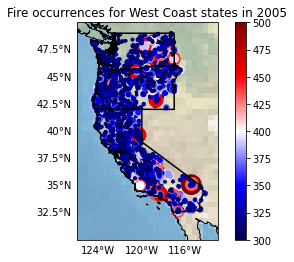

In [12]:
# example plot 2005

#  using cartopy to generate coastlines and geodetic boundaries
ax =plt.axes(projection= ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()
ax.set_extent([-126, -113, 30, 50],ccrs.PlateCarree())

#  coordinate grid and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.ylabels_right = False 
gl.xlabels_top = False
gl.xlines = False
gl.ylines = False

#  state boundaries 
ax.plot (fileCA[:,0], fileCA[:,1], c='k')
ax.plot (fileOR[:,0], fileOR[:,1], c='k')
ax.plot (fileWA[:,0], fileWA[:,1], c='k')

plt.title('Fire occurrences for West Coast states in 2005')
plt.rcParams["figure.figsize"] = (6.5,8)

# variables that correspond to the intensity of the fires
fr_britCombine = fr_mask_dataset['fire2005US']['brit'] * fr_mask_dataset['fire2005US']['fr_maskCombine']
size = (fr_britCombine**8)*1e-19 # this should help exaggerate the size of brighter fires, else they are not visible

# scatter plot of fires
plt.scatter (fr_mask_dataset['fire2005US']['lon'], fr_mask_dataset['fire2005US']['lat'], c = fr_britCombine, s= size, cmap = 'seismic')
# plt.axis('off')
plt.colorbar()

# saving the image
# plt.savefig('fire2005', dpi=300)

C:\Users\Faisal\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\Faisal\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


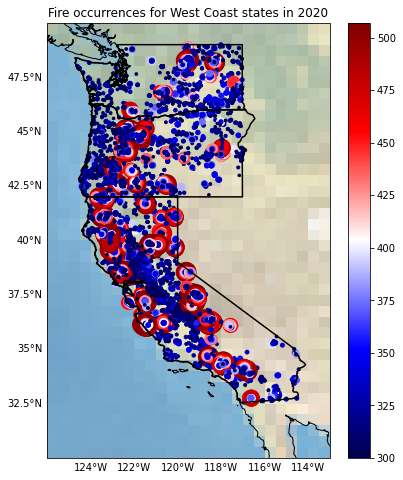

In [13]:
# example plot 2020

#  using cartopy to generate coastlines and geodetic boundaries
ax =plt.axes(projection= ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()
ax.set_extent([-126, -113, 30, 50],ccrs.PlateCarree())

#  coordinate grid and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.ylabels_right = False 
gl.xlabels_top = False
gl.xlines = False
gl.ylines = False

#  state boundaries 
plt.plot (fileCA[:,0], fileCA[:,1], c='k')
plt.plot (fileOR[:,0], fileOR[:,1], c='k')
plt.plot (fileWA[:,0], fileWA[:,1], c='k')

plt.title('Fire occurrences for West Coast states in 2020')
plt.rcParams["figure.figsize"] = (6.5,8)

# variables that correspond to the intensity of the fires
fr_britCombine = fr_mask_dataset['fire2020US']['brit'] * fr_mask_dataset['fire2020US']['fr_maskCombine']
size = (fr_britCombine**8)*1e-19

# scatter plot of fires
plt.scatter (fr_mask_dataset['fire2020US']['lon'], fr_mask_dataset['fire2020US']['lat'], c = fr_britCombine, s= size, cmap = 'seismic')
plt.colorbar()

# saving the image
# plt.savefig('fire2020', dpi=300)

### The following cells analyze the annual trends in fire occurences, and involves some preliminary regression analysis.

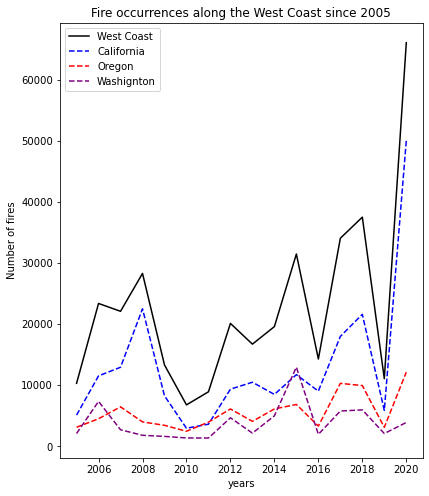

In [14]:
# number of fires per year 
fr_numberCombine = [np.count_nonzero(~np.isnan(fr_mask_dataset[key]['fr_maskCombine'])) for key in fr_mask_dataset]
fr_numberWA = [np.count_nonzero(~np.isnan(fr_mask_dataset[key]['fr_maskWA'])) for key in fr_mask_dataset]
fr_numberOR = [np.count_nonzero(~np.isnan(fr_mask_dataset[key]['fr_maskOR'])) for key in fr_mask_dataset]
fr_numberCA = [np.count_nonzero(~np.isnan(fr_mask_dataset[key]['fr_maskCA'])) for key in fr_mask_dataset]

# plotting data for annual fires
fig, ax = plt.subplots()
ax.plot (temporalPeriod, fr_numberCombine, 'k-', label = 'West Coast')
ax.plot (temporalPeriod, fr_numberCA, 'b--', label = 'California')
ax.plot (temporalPeriod, fr_numberOR, 'r--', label ='Oregon')
ax.plot (temporalPeriod, fr_numberWA, c='purple', ls ='--', label = 'Washignton')

# labels
ax.title.set_text('Fire occurrences along the West Coast since 2005')
ax.set_ylabel('Number of fires')
ax.set_xlabel('years')

plt.legend() # legend

# fig.savefig('fire_total_annual', dpi=300)

Text(0.5, 0, 'years')

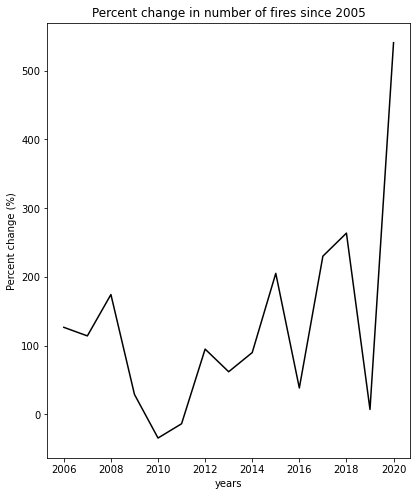

In [15]:
# percent change since 2005
fr_percentChange = np.asarray([((fr_numberCombine[i+1]-fr_numberCombine[0])/fr_numberCombine[0])*100 for i in range(len(fr_numberCombine)-1)])


# labels
fig, ax = plt.subplots()

plt.plot (temporalPeriod[1:], fr_percentChange, c='k')

ax.title.set_text('Percent change in number of fires since 2005')
ax.set_ylabel('Percent change (%)')
ax.set_xlabel('years')

# fig.savefig('fire_total_annual', dpi=300)


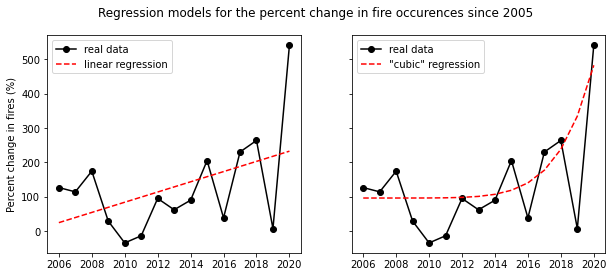

In [16]:
# linear model 
fr_a1 = np.arange (1,16, 1)
fr_a2 = np.ones(15)
# fr_a3 = np.square(fr_a1)
fr_a3 = np.power(fr_a1,7)

# linear model
fr_A = np.stack((fr_a1,fr_a2)).T
xdag1 = np.linalg.pinv(fr_A)@fr_percentChange
b1 = np.polyval (xdag1, fr_a1 )


# cubic model
fr_A2 = np.stack((fr_a1,fr_a2, fr_a3)).T
xdag2 = np.linalg.pinv(fr_A2)@fr_percentChange
# b2 = np.polyval (xdag2, fr_a1 )
b2 = xdag2[0]  + xdag2[1]* fr_a2  + xdag2[2]* fr_a3

# plotting results
fig, ax = plt.subplots(figsize=(10,4), nrows=1, ncols=2, sharey=True)
# fig = (figsize=(10,20))

ax[0].plot(temporalPeriod[1:], fr_percentChange, 'ko-', label = 'real data')
ax[0].plot (temporalPeriod[1:], b1,'r--', label = 'linear regression')
ax[1].plot(temporalPeriod[1:], fr_percentChange, 'ko-', label = 'real data')
ax[1].plot (temporalPeriod[1:], b2, 'r--', label = '"cubic" regression')

# labels
plt.suptitle('Regression models for the percent change in fire occurences since 2005 ')
ax[0].set_ylabel('Percent change in fires (%)')
# ax.set_xlabel('years')

ax[0].legend() # legend
ax[1].legend() # legend

# fig.savefig('fire_percentage_regression', dpi=300)


The cells below are focused on extracting the fire data as points for cluster analysis later on. This performed for the year 

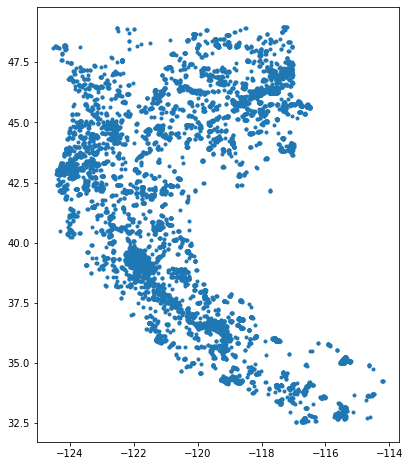

In [17]:
# extracting fire coordinates for 2005
lon = fr_mask_dataset['fire2005US']['lon']
lat = fr_mask_dataset['fire2005US']['lat']

frLon2005 = lon * fr_mask_dataset['fire2005US']['fr_maskCombine']
frLat2005 = lat * fr_mask_dataset['fire2005US']['fr_maskCombine']

frLon2005 = frLon2005[~np.isnan(frLon2005)]
frLat2005 = frLat2005[~np.isnan(frLat2005)]
cl2005 = np.column_stack((frLon2005,frLat2005))

plt.plot (frLon2005,frLat2005, '.')

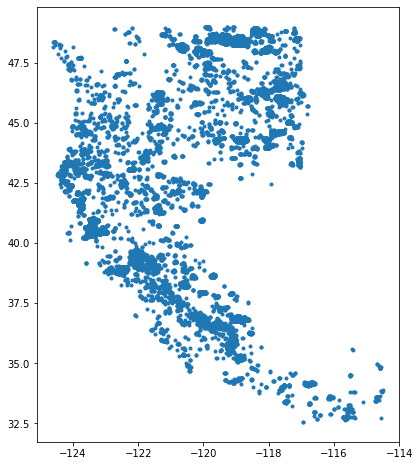

In [18]:
# extracting fire coordinates for 2015
lon = fr_mask_dataset['fire2015US']['lon']
lat = fr_mask_dataset['fire2015US']['lat']

frLon2015 = lon * fr_mask_dataset['fire2015US']['fr_maskCombine']
frLat2015 = lat * fr_mask_dataset['fire2015US']['fr_maskCombine']

frLon2015 = frLon2015[~np.isnan(frLon2015)]
frLat2015 = frLat2015[~np.isnan(frLat2015)]
cl2015 = np.column_stack((frLon2015,frLat2015))

plt.plot (frLon2015,frLat2015, '.')

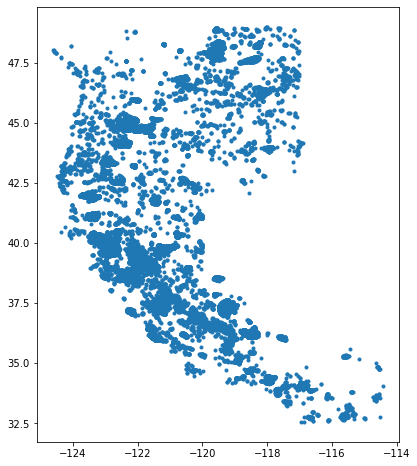

In [19]:
# extracting fire coordinates for 2020
lon = fr_mask_dataset['fire2020US']['lon']
lat = fr_mask_dataset['fire2020US']['lat']

frLon2020 = lon * fr_mask_dataset['fire2020US']['fr_maskCombine']
frLat2020 = lat * fr_mask_dataset['fire2020US']['fr_maskCombine']

frLon2020 = frLon2020[~np.isnan(frLon2020)]
frLat2020 = frLat2020[~np.isnan(frLat2020)]
cl2020 = np.column_stack((frLon2020,frLat2020))

plt.plot (frLon2020,frLat2020, '.')

## Groundwater Analysis
The next set of code cells switch over to the groundwater storage data as a drought indicator and some preliminary analysis for that data. Some of the cells are commented out because the relevant data was downloaded and extracted. The required data was saved in a dicitonary and then a pickle file for covenience.  

In [20]:
# # accessing the GES DISC data using a url for Jan 6th and including coordinates and gw_inst data
# url = 'https://hydro1.gesdisc.eosdis.nasa.gov/opendap/hyrax/GRACEDA/GRACEDADM_CLSM0125US_7D.4.0/2020/GRACEDADM_CLSM0125US_7D.A20200106.040.nc4?lat[0:1:200],lon[0:1:100],time[0:1:0],gws_inst[0:1:0][0:1:200][0:1:100]'

# # creating a login session 
# usn = 'fadams'
# pswd = 'Herewego007'
# session= setup_session( usn, pswd, check_url = url)


In [21]:
# # creating a list of file names from a txt file containg names downloaded from the GESC DISC site
# file = open ('./Drought_Files/subset_GRACEDADM.txt', 'r')
# filenames = file.readlines()
# file.close
# filenames = [i.rstrip('\n') for i in filenames] # removing the newline character from each line 

# # removing first entry because it is a README file 
# filenames = filenames[1:]
# filenames[0] # just checking 

In [22]:
# # obtaining data for 5 consecutive years, from 2015 to 2020 

# # using one URL as a reference 
# urlRef = 'https://hydro1.gesdisc.eosdis.nasa.gov/data/GRACEDA/GRACEDADM_CLSM0125US_7D.4.0/2015/GRACEDADM_CLSM0125US_7D.A20150216.040.nc4'

# # finding index at the part of the url where the link is different from the link in the list
# url_idx = urlRef.index('GRACEDA/')
# url_name = urlRef.index('_7D.A')

# # customisations to the end of the url for variables including coordinates, time and groundwater percentile 
# url_end = '?lat[0:1:200],lon[0:1:100],time[0:1:0],gws_inst[0:1:0][0:1:200][0:1:100]'

# # url = 'https://hydro1.gesdisc.eosdis.nasa.gov/data/GRACEDA/GRACEDADM_CLSM0125US_7D.4.0/2015/GRACEDADM_CLSM0125US_7D.A20150216.040.nc4'



The code cell below iterates throught the list of file links, extracts the relevant data and saves it all to a dictionary. The cells following that save and read teh dictionary from a pickle file. 

In [23]:

# # creating empty dicitonary to save the data
# dataset = {}
# # iterating through and storing the data in the dictionary
# for i in tqdm(filenames):
#     flink = i[url_idx:]
#     url_full = 'https://hydro1.gesdisc.eosdis.nasa.gov/opendap/hyrax/' + flink + url_end
    
#     data = open_url (url_full, session = session) # opening the dataset   
    
#     fname = i[url_name+4:-8]

#     temp = {}
#     lat = {}
#     lon = {}
#     time = {}
#     gws = {}
        
#     lat = data.lat[:].data
#     lon = data.lon[:].data
#     time = data.time[:].data
#     gw = data.gws_inst.array[:].data
    
#     temp ['lat'] = lat
#     temp ['lon'] = lon
#     temp ['time'] = time
#     temp ['gw']  = gw
    
#     dataset[fname] = temp
    
    

In [24]:
# hint from https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file
file = './Drought_Files/gw_dataset.pkl'

# with open (file, 'wb') as f:
#     pickle.dump(dataset, f)

In [25]:
# with open (file, 'rb') as f:
#     gwDict = pickle.load(f)

# gwDict['A20150105']['time']

In [26]:
# # code to find only the points inside the polygons 
# gwsDict = {}
# for key in tqdm(gwDict):
#     lat = gwDict[key]['lat']
#     lon = gwDict[key]['lon']
#     time = gwDict[key]['time']
#     gw = gwDict[key]['gw']
        
#     gwMask_CA = np.zeros(gw[0].shape)
#     gwMask_OR = np.zeros(gw[0].shape)
#     gwMask_WA = np.zeros(gw[0].shape)    
#     gwMaskCombine = np.zeros(gw[0].shape)
    
#     N_lat = range(len(lat))
#     N_lon = range(len(lon))
    
#     temp = {}
    
#     for i in N_lon:
#         for j in N_lat:
            
#             pt = Point (lon[i], lat[j])
                        
#             CA_maskVal = int (polyCA.contains(pt))
#             OR_maskVal = int (polyOR.contains(pt))
#             WA_maskVal = int (polyWA.contains(pt))
#             combine_maskVal = int (polyCombine.contains(pt))

#             gwMask_CA[j,i] = CA_maskVal
#             gwMask_OR[j,i] = OR_maskVal
#             gwMask_WA[j,i] = WA_maskVal
#             gwMaskCombine[j,i] = combine_maskVal
            
            
#     gwCA = gwMask_CA * gw
#     gwOR = gwMask_OR * gw
#     gwWA = gwMask_WA * gw
#     gwCombine = gwMaskCombine * gw

#     gwCA[gwCA <= 0] = np.nan
#     gwOR[gwOR <= 0] = np.nan
#     gwWA[gwWA <= 0] = np.nan
#     gwCombine[gwCombine <= 0] = np.nan

#     temp ['lat'] = lat
#     temp ['lon'] = lon
#     temp ['time'] = time
#     temp ['gwCA'] = gwCA
#     temp ['gwOR'] = gwOR
#     temp ['gwWA'] = gwWA
#     temp ['gwCombine'] = gwCombine

#     gwsDict [key] = temp

            
            
            
            

In [27]:
# hint from https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file
sub_file = './Drought_Files/gw_sub_dataset.pkl'

# with open (sub_file, 'wb') as f:
#     pickle.dump(gwsDict, f)

In [28]:
with open (sub_file, 'rb') as f:
    gwsDict = pickle.load(f)

# gwsDict.keys()

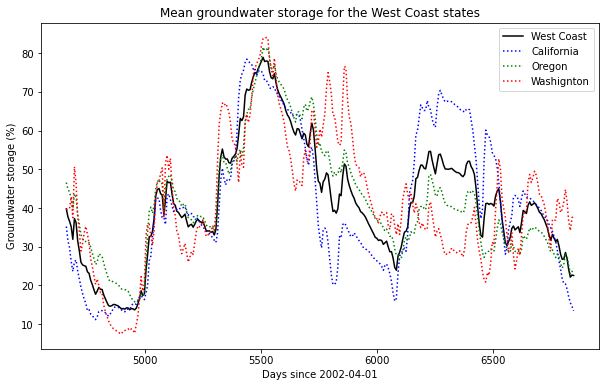

In [29]:
# obtaining means and plotting them
meanGW_combine = [np.nanmean(gwsDict[key]['gwCombine']) for key in gwsDict ]
meanGW_CA = [np.nanmean(gwsDict[key]['gwCA']) for key in gwsDict ]
meanGW_OR = [np.nanmean(gwsDict[key]['gwOR']) for key in gwsDict ]
meanGW_WA = [np.nanmean(gwsDict[key]['gwWA']) for key in gwsDict ]
time = [gwsDict[key]['time'] for key in gwsDict]

plt.figure (figsize = (10,6))
plt.plot (time, meanGW_combine, 'k-', label = 'West Coast')

plt.plot(time, meanGW_CA, 'b:', label = 'California')
plt.plot(time, meanGW_OR, 'g:', label = 'Oregon')
plt.plot(time, meanGW_WA, 'r:', label='Washignton')



plt.title('Mean groundwater storage for the West Coast states')
plt.ylabel('Groundwater storage (%)')
plt.xlabel('Days since 2002-04-01')
plt.legend()

# plt.savefig('gw_mean_weekly.png', dpi=300)

C:\Users\Faisal\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\Faisal\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


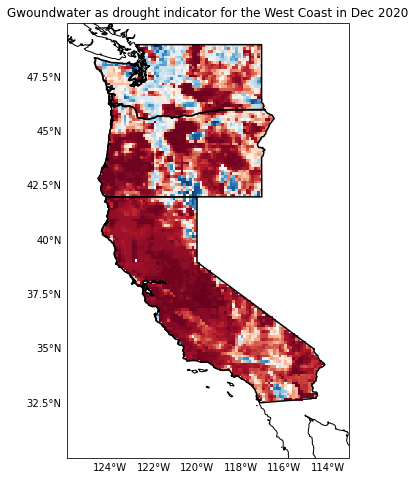

<Figure size 468x576 with 0 Axes>

In [30]:
# example plot Dec 2020

#  using cartopy to generate coastlines and geodetic boundaries
ax =plt.axes(projection= ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-126, -113, 30, 50],ccrs.PlateCarree())

#  coordinate grid and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.ylabels_right = False 
gl.xlabels_top = False
gl.xlines = False
gl.ylines = False

#  state boundaries 
plt.plot (fileCA[:,0], fileCA[:,1], c='k')
plt.plot (fileOR[:,0], fileOR[:,1], c='k')
plt.plot (fileWA[:,0], fileWA[:,1], c='k')

lon = gwsDict['A20201228']['lon']
lat = gwsDict['A20201228']['lat']

plt.title('Gwoundwater as drought indicator for the West Coast in Dec 2020')

lonGrid, latGrid = np.meshgrid(lon,lat)

gw2020_end = gwsDict['A20201228']['gwCombine']
plt.figure(figsize=(6.5,8))

ax.pcolormesh (lonGrid, latGrid, gw2020_end[0], cmap = 'RdBu')

# saving the image
# plt.savefig('gw2020.pdf', dpi=300)

C:\Users\Faisal\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\Faisal\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


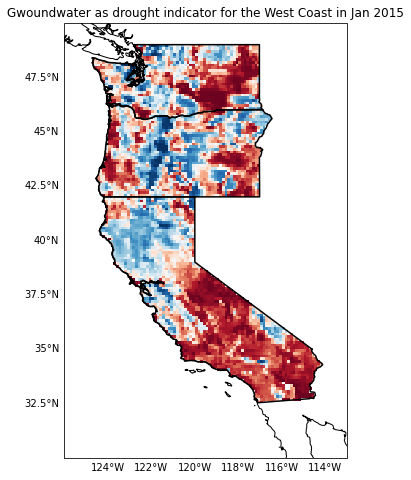

<Figure size 468x576 with 0 Axes>

In [31]:
# example plot Jan 2015

#  using cartopy to generate coastlines and geodetic boundaries
ax =plt.axes(projection= ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-126, -113, 30, 50],ccrs.PlateCarree())

#  coordinate grid and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.ylabels_right = False 
gl.xlabels_top = False
gl.xlines = False
gl.ylines = False

#  state boundaries 
plt.plot (fileCA[:,0], fileCA[:,1], c='k')
plt.plot (fileOR[:,0], fileOR[:,1], c='k')
plt.plot (fileWA[:,0], fileWA[:,1], c='k')

lon = gwsDict['A20150105']['lon']
lat = gwsDict['A20150105']['lat']

plt.title('Gwoundwater as drought indicator for the West Coast in Jan 2015')

lonGrid, latGrid = np.meshgrid(lon,lat)

gw2020_end = gwsDict['A20150105']['gwCombine']
plt.figure(figsize=(6.5,8))
ax.pcolormesh (lonGrid, latGrid, gw2020_end[0], cmap = 'RdBu')

# saving the image
# plt.savefig('gw2015', dpi=300)

C:\Users\Faisal\AppData\Local\Temp/ipykernel_26568/3737553112.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh (lonGrid, latGrid, gw2020_end[0], cmap = 'RdBu')


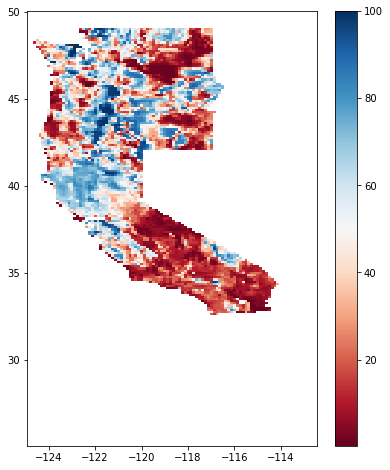

In [32]:
# difficulty plotting colorbar so its added here 
plt.pcolormesh (lonGrid, latGrid, gw2020_end[0], cmap = 'RdBu')
plt.colorbar()

# plt.savefig('gwcolorbar', dpi=300)

The next set of cells involve some SVD spatial and temporal analysis

In [33]:
gwmap = np.asarray([gwsDict[key]['gwCombine'][0] for key in gwsDict])

X = gwmap.reshape((313,len(lon)*len(lat)))
X = np.transpose(X)
X.shape

(20301, 313)

In [34]:
# Checking that the reshaping worked
t1 = X[:,0].reshape((len(lat),len(lon)))
t1.shape
# img = plt.imshow(np.flipud(t1),cmap = 'RdYlBu')

(201, 101)

In [35]:
# SVD for gw
np.nan_to_num(X,0)
u,s,vT = np.linalg.svd(X, full_matrices=0)

The cell below is used to determmine the number of values necessary to recreate a certain portion of the original data

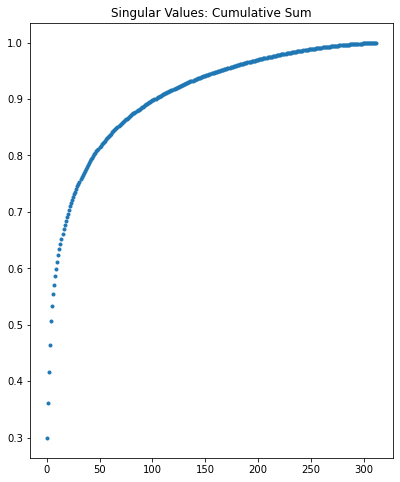

In [36]:
plt.figure()
plt.plot(np.cumsum(s)/np.sum(s),'.')
plt.title('Singular Values: Cumulative Sum')
plt.savefig('SVD_cumSum', dpi=300)
plt.show()


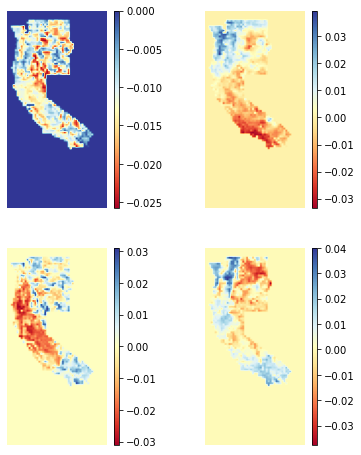

In [37]:
# spatial trends
fig, axs = plt.subplots(2,2)
axs = axs.reshape(-1)

for i in range(4):
    U = np.flipud(np.reshape(u[:,i],(len(lat),len(lon))))
    U2 = U[::2, ::2]
    im = axs[i].imshow(U2, cmap='RdYlBu')
    axs[i].imshow(U2,cmap='RdYlBu')
    axs[i].axis('off')
    
    divider = make_axes_locatable(axs[i])
    cax = divider.append_axes('right', size='5%', pad=0.1)
    fig.colorbar(im, cax=cax, orientation='vertical');
# fig.savefig('SVD_gw.png')

This cell generates a figure corresponding to the 7th spatial singular value.

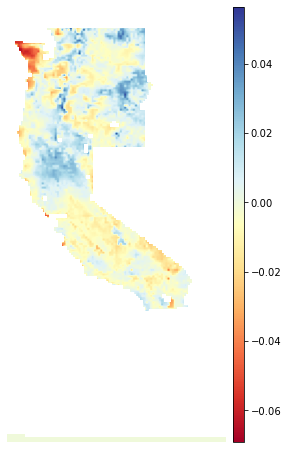

In [38]:
fig, axs = plt.subplots()
U = np.flipud(np.reshape(u[:,7],(len(lat),len(lon))))
U[U==0]=np.nan
U2 = U #[::2, ::2]
im = axs.imshow(U2, cmap='RdYlBu')
axs.imshow(U2,cmap='RdYlBu')
axs.axis('off')

divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im, cax=cax, orientation='vertical');

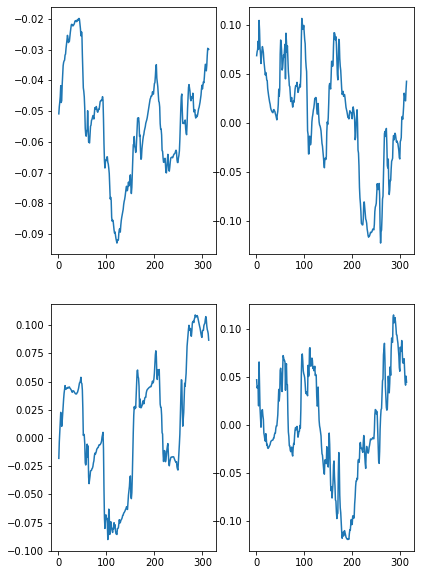

In [39]:
# temporal trends
fig,axs = plt.subplots(nrows = 2, ncols = 2, figsize=(6.5,10))
axs = axs.reshape(-1)
for i in range(4):
    V = vT[i,:]
    im = axs[i].plot(range(1,len(V)+1),V)
    
# fig.savefig('SVDtemporal_gw.png')

This cell generates a figure corresponding to the 7th spatial singular value.

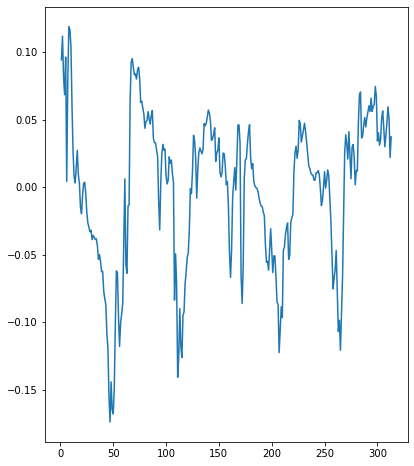

In [40]:
# 
fig,axs = plt.subplots() #nrows = 2, ncols = 2, figsize=(6.5,10))
# axs = axs.reshape(-1)

V = vT[7,:]
im = axs.plot(range(1,len(V)+1),V)
    
# fig.savefig('SVDtemporal_gw.png')

### Cluster Analysis 2015 and 2020
The following cells compute the KMeans cluster for a given period, and overlay the resulting clusters on a plot for the groundwater storage distribution for a corresponding period.

In [ ]:
plt.pcolormesh(lon, lat, gwmap[0], cmap='RdBu')
gwmap = np.asarray([gwsDict[key]['gwCombine'][0] for key in gwsDict])
t = gwmap[51]
t[t<=95] = np.nan
plt.pcolormesh(lon,lat,t, cmap='RdBu')
plt.colorbar()
np.count_nonzero(~np.isnan(t))


In [42]:
kmeans2020 = KMeans(n_clusters=18, random_state=0).fit(cl2020)  # Compute k-means clustering for 2020
c4 = kmeans2020.cluster_centers_   # obtain centers of clusters,

cl2020Predict = kmeans2020.predict(cl2020) 


C:\Users\Faisal\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\Faisal\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


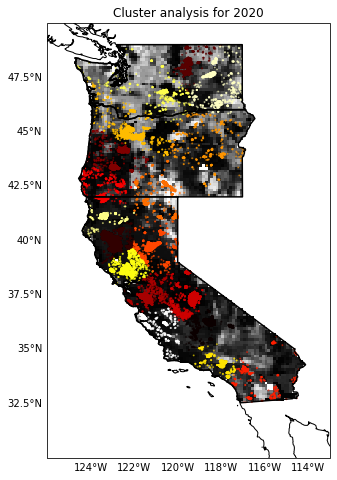

<Figure size 468x576 with 0 Axes>

In [43]:


#  using cartopy to generate coastlines and geodetic boundaries
ax =plt.axes(projection= ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-126, -113, 30, 50],ccrs.PlateCarree())

#  coordinate grid and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.ylabels_right = False 
gl.xlabels_top = False
gl.xlines = False
gl.ylines = False

#  state boundaries 
plt.plot (fileCA[:,0], fileCA[:,1], c='k')
plt.plot (fileOR[:,0], fileOR[:,1], c='k')
plt.plot (fileWA[:,0], fileWA[:,1], c='k')

lon = gwsDict['A20201228']['lon']
lat = gwsDict['A20201228']['lat']

plt.title('Cluster analysis for 2020')

lonGrid, latGrid = np.meshgrid(lon,lat)

gw2020_end = gwsDict['A20201228']['gwCombine']
plt.figure(figsize=(6.5,8))
ax.pcolormesh (lonGrid, latGrid, gw2020_end[0], cmap = 'gray')

# plt.figure(figsize=(10,10))

ax.scatter(cl2020[:,0], cl2020[:,1], c=kmeans2020.labels_, cmap = 'hot', alpha =0.5, s=1)
# saving the image
# plt.savefig('fr_gw_cluster2020', dpi=300)
plt.show()

In [44]:
kmeans2015 = KMeans(n_clusters=63, random_state=0).fit(cl2015)  # Compute k-means clustering for 2015
c4 = kmeans2015.cluster_centers_   # obtain centers of clusters,

cl2015Predict = kmeans2015.predict(cl2015) 




C:\Users\Faisal\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\Faisal\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


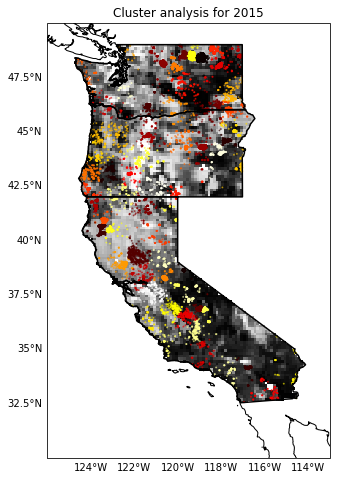

<Figure size 468x576 with 0 Axes>

In [45]:

plt.clf()
# example plot Jan 2015

#  using cartopy to generate coastlines and geodetic boundaries
ax =plt.axes(projection= ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-126, -113, 30, 50],ccrs.PlateCarree())

#  coordinate grid and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.ylabels_right = False 
gl.xlabels_top = False
gl.xlines = False
gl.ylines = False

#  state boundaries 
plt.plot (fileCA[:,0], fileCA[:,1], c='k')
plt.plot (fileOR[:,0], fileOR[:,1], c='k')
plt.plot (fileWA[:,0], fileWA[:,1], c='k')

lon = gwsDict['A20150105']['lon']
lat = gwsDict['A20150105']['lat']

plt.title('Cluster analysis for 2015')

lonGrid, latGrid = np.meshgrid(lon,lat)

gw2015_end = gwsDict['A20150105']['gwCombine']
plt.figure(figsize=(6.5,8))
ax.pcolormesh (lonGrid, latGrid, gw2015_end[0], cmap = 'gray')

# plt.figure(figsize=(10,10))

ax.scatter(cl2015[:,0], cl2015[:,1], c=kmeans2015.labels_, cmap = 'hot', alpha =0.5, s=1)
# saving the image
# plt.savefig('fr_gw_cluster2015.png', dpi=300)


In [ ]:
# plt.pcolormesh(lon, lat, gwmap[0], cmap='hot')
t = gwmap[0]
t[t<=90] = np.nan
# plt.pcolormesh(lon,lat,t, cmap='hot')
np.count_nonzero(~np.isnan(t))

In [ ]:
# plt.pcolormesh(lon, lat, gwmap[0], cmap='hot')
t = gwmap[312]
t[t<=90] = np.nan
# plt.pcolormesh(lon,lat,t, cmap='hot')
np.count_nonzero(~np.isnan(t))